[*********************100%***********************]  21 of 21 completed


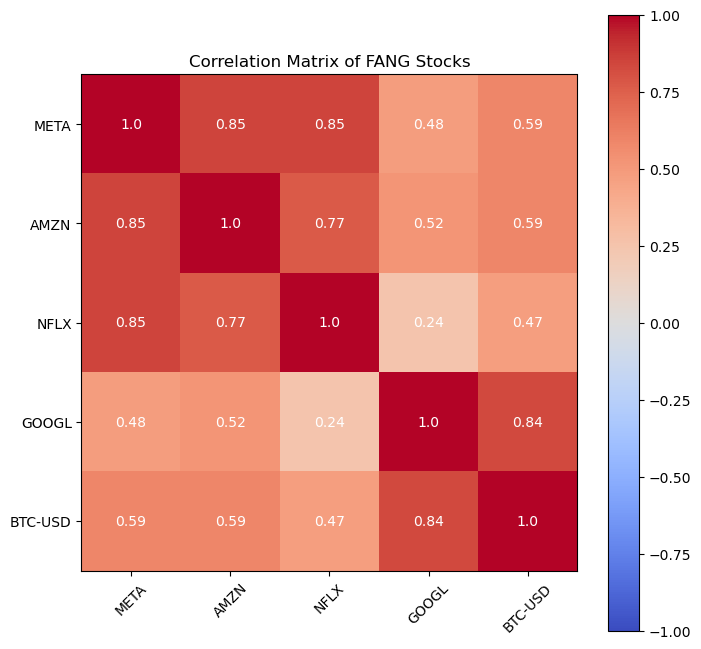

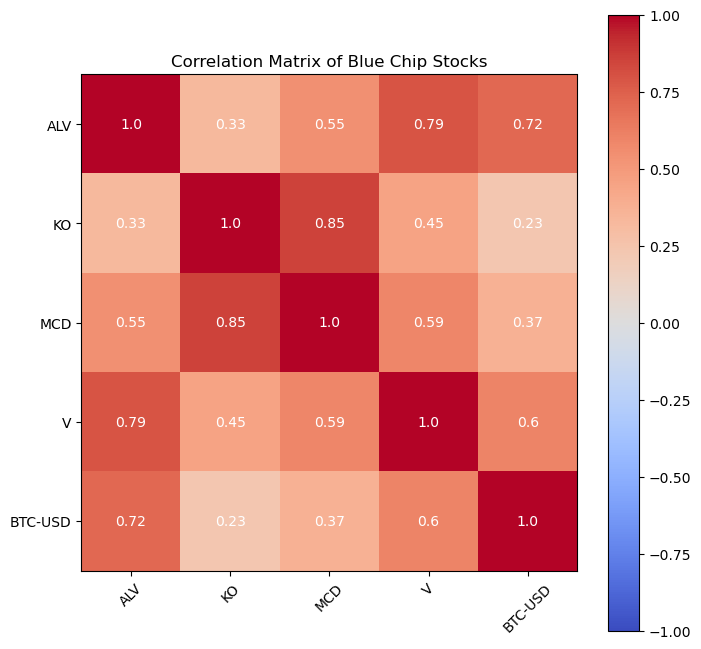

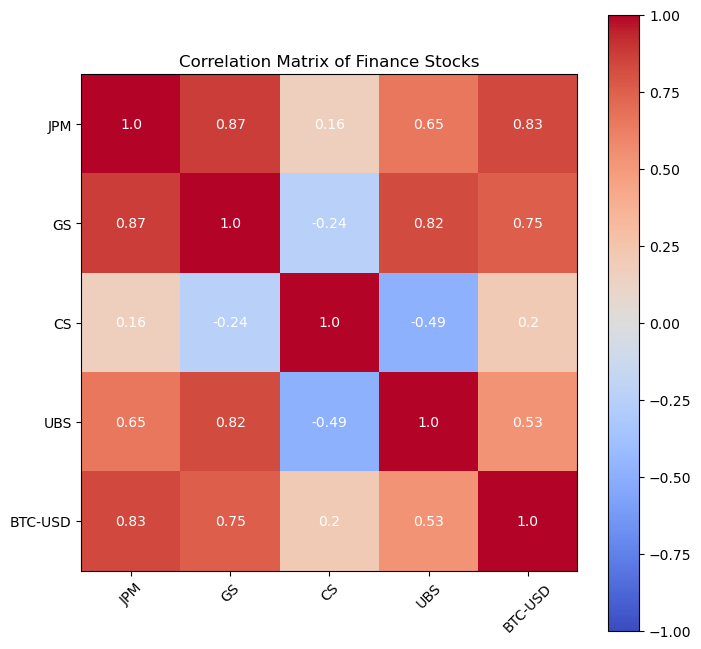

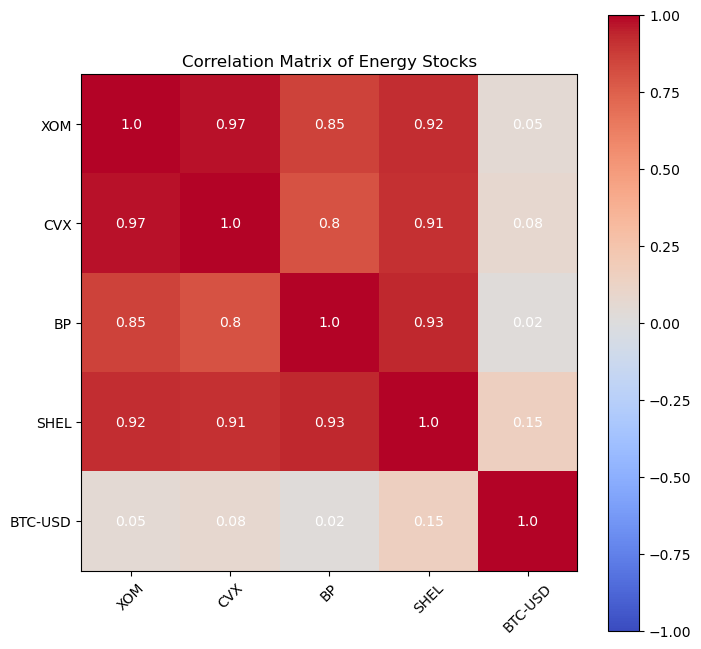

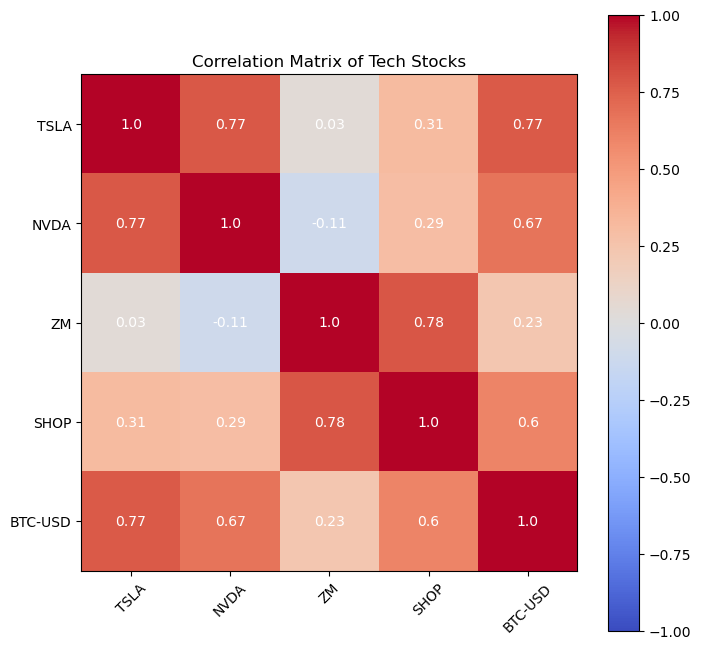

In [1]:
import yfinance as yf
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Define the lists of stock groups
fang_stocks = ['META', 'AMZN', 'NFLX', 'GOOGL', 'BTC-USD']
bluechip_stocks = ['ALV', 'KO', 'MCD', 'V', 'BTC-USD']
finance_stocks = ['JPM', 'GS', 'CS', 'UBS', 'BTC-USD']
energy_stocks = ['XOM', 'CVX', 'BP', 'SHEL', 'BTC-USD']
tech_stocks = ['TSLA', 'NVDA', 'ZM', 'SHOP', 'BTC-USD']

# Combine all stocks into a single list
all_stocks = fang_stocks + bluechip_stocks + finance_stocks + energy_stocks + tech_stocks

# Retrieve data for all stocks and Bitcoin
data = yf.download(all_stocks, start="2020-01-01", end="2023-04-30")

# Select only the closing prices
closing_prices = data['Close']


# Create a SQLite database and a connection to it
conn = sqlite3.connect('stocks.db')

# Insert the downloaded stock data into the database
closing_prices.to_sql('closing_prices', conn, if_exists='replace')


# Define a dictionary with stock groups
stock_groups = {
    'FANG': fang_stocks,
    'Blue Chip': bluechip_stocks,
    'Finance': finance_stocks,
    'Energy': energy_stocks,
    'Tech': tech_stocks,
}

# Loop over all stock groups and calculate the correlation matrix
for group_name, stocks in stock_groups.items():
    # Query the closing prices for the group of stocks
    columns = ', '.join([f'"{stock}"' for stock in stocks])
    query = f"SELECT Date, {columns} FROM closing_prices"
    group_prices = pd.read_sql_query(query, conn, index_col='Date', parse_dates=['Date'])
    # Calculate the correlation matrix for the group of stocks
    corr_matrix = group_prices.corr()
    # Plot the correlation matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(f'Correlation Matrix of {group_name} Stocks')
    plt.xticks(range(len(stocks)), stocks, rotation=45)
    plt.yticks(range(len(stocks)), stocks)
    
     # Add numerical values to the plot
    for i in range(len(stocks)):
        for j in range(len(stocks)):
            plt.text(i, j, round(corr_matrix.iloc[i, j], 2), ha='center', va='center', color='white')
            
            
    plt.show()
